# Why do we need dimensionality reduction?

We resort to dimensionality reduction techniques basically for two reasons:

1. **Visualization**: Our brains are used to thinking in, at most, three-dimensional space, and we're having difficulties imagining higher order dimensions. We can easily understand the orientations and the relationships between the objects in one, two, and three dimensions, but the same is not true as the dimensionality increases. Since visualization is an important aspect of any exploratory data analysis, we need to reduce the dimensions in our high-dimensional data while keeping as many of the associations, relations, and information as we can. Thus, dimensionality reduction techniques are heavily utilized for visualization purposes.

2. **The curse of dimensionality**: In machine learning tasks, we estimate the parameters of our models with the available data at hand. The number of observations in our data is usually limited and collecting additional data is, most of the time, very hard if not impossible. However, if we include a lot of features in our models, the statistical powers may decrease. More formally, the search space for the parameters of the models increases **exponentially** with the number of dimensions (features) of the data. Thus, we resort to dimensionality reduction techniques to limit the dimensions in the data. Since we covered the **curse of dimensionality** in the exploratory data analysis module of this bootcamp, we keep the discussion short here.

# What is PCA

PCA is probably the most popular dimensionality reduction technique and the first one to try when a need for reducing the dimension of the data arises. **The main idea of PCA is to find a low-dimensional representation of the high-dimensional data by retaining as much variation in the data as possible**. Retaining the variation makes sense because of the fact that variance in the data can be thought of as the information in it. So, the objective of PCA is to keep the maximum information from the high-dimensional space retained in the low-dimensional representation.

The representations produced by PCA are called the **principal components**. So, if we want a one-dimensional representation of our data, we just take the first principal component and if we want a two-dimensional representation, we take the first two principal components etc. But, what exactly are these principal components? The figure below ([source](http://alexhwilliams.info/itsneuronalblog/2016/03/27/pca/)) illustrates how PCA constructs the first principal component:

![pca](pca.png)

In the figure above, the dots represent the data points. As we said before, PCA tries to retain the variance in the data as much as possible. In doing so, it actually searches for a line (or more correctly a vector) such that the perpendicular projections of the data points on this line (the red dots in the left figure) have the maximum variance. This is equivalent to minimizing the squared distances of the data points to this line (as the figure at right demonstrates).

But this is just the first principal component. How does PCA find the other components? Actually, PCA does the same thing for all the principal components, but for each component, it imposes an important restriction. For example, for the second component, PCA forces it to be perpendicular to the first component. So among the perpendicular lines, PCA chooses the one that maximizes the variance (or minimizes the squared distances). For the third component, PCA restricts it to be perpendicular to both first and the second components and chooses the one that maximizes variance (or minimizes the squared distances). The rest of the components are also constructed in the same manner. Each component is perpendicular to all of the previous components and, given this constraint, is the one that maximizes the variance in the data.

Now, let's briefly recap how PCA algorithm works:

# PCA algorithm

The exact analytical derivation of the PCA algorithm is slightly involved. We won't go into the details of the math to construct the principal components as we covered it more thoroughly in the exploratory data analysis module. Here, we just provide a brief overview of the PCA algorithm:

1. First, PCA calculates the covariance matrix of the variables that we want to transform.

2. Second, it calculates the eigenvectors and the eigenvalues of the covariance matrix calculated in the previous step. 

3. Then it sorts out the eigenvectors with respect to their corresponding eigenvalues such that the eigenvector with the highest eigenvalue comes first, the eigenvector with the second highest eigenvalue comes next, and so on. The first principal component is the first eigenvector after sorting, the second principal component is the second eigenvector after sorting, etc.

If you want to read more about the mathematical formulation and the solutions of the PCA algorithm, you can start with [this blog post](http://alexhwilliams.info/itsneuronalblog/2016/03/27/pca/). You'll find out that there are several solution methods for the algorithm above all of which involve different linear algebra methods.

# Some insights on what PCA achieves

Understanding the algorithm of a technique is important. But, in order to apply it effectively and assess how it performs on different data, we must build the intuition of what that technique achieves. Below, we discusses two important insights regarding what PCA accomplishes. These insights will shed light on the differences between PCA and the other dimensinality reduction methods we'll cover later in this module.

1. **The principal components are linear combinations of the original variables. Hence, PCA is a linear dimensionality reduction technique**. This point is quite important when comparing different dimensionality reduction methods. Producing a lower-dimensional representation of some complex data, like image, sound and text, is a challenging task, and linear methods may come short of this. In the next checkpoint, we present another dimensionality reduction technique that is non-linear, and there we provide a comparison of it and PCA.

2. Another important insight regarding what PCA achieves is that **PCA preserves the global structure of the similarity in the data**. That is to say, the far away observations (that are dissimilar to each other) in the original dimensions tend to be far away from each other in the lower-dimensional PCA representation too. For example, when we visualize high-dimensional data in the two-dimensional space using the first two principal components, we usually observe that the most dissimilar data points are drawn in the opposite directions of the graph.

# Important points to consider

Let's briefly discuss some important points when applying PCA on our datasets.

* Before applying PCA, we should always mean normalize our variables. That is, for each variable we have, we calculate the mean and subtract that mean from every observation of that variable. This makes our variables have mean zero.

* PCA is sensitive to the scale of the data. For example, if one variable is the price of houses (in order of hundred thousands) and another one is the living area of the houses (in order of hundreds), then the effect of the price variable would be much higher than the effect of the living area variable. Thus, if our variables exhibit different scales, then we should always standardize our variables before applying PCA to them. Note that standardizing the variables also includes mean normalization, so if we standardize our variables we don't need to mean normalize beforehand.

# PCA in action

It's time to see PCA in action. You already learned how to apply PCA previously, as we also used it in the previous checkpoints of this module when visualizing the data. Here, we apply it on a famous optical character recognition (OCR) dataset called **MNIST**. This dataset comprises of 70000 gray-scale images of handwritten digits. We apply PCA on this dataset and then visualize the first two principal components to see whether the different digits can be represented in the two dimensional space such that the same digits are close together and the different digits are separated clearly.

Let's first import the libraries we use:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA

We load the MNIST dataset using scikit-learn's `datasets` module. We use `fetch_openml` method from this module to load the MNIST data. Note that this method is relatively new in scikit-learn and you need to have at least the `0.20` version of it installed. You can check the version of your scikit-learn by running the following code:

In [2]:
import sklearn
sklearn.__version__

'0.20.3'

**Note**: You don't have to use this method to download the MNIST dataset. It's available online [here](http://yann.lecun.com/exdb/mnist/). You can also download the dataset from that link and then load it in your own way. Notice that the dataset in the link is separated into two (as training and test sets), but we use the combined version. You can combine the train and test sets into one or you can just use the train set. The results should look similar to each other.

If you want to use `fetch_openml` function and your version of scikit-learn is older than `0.20`, you can run the following code on the command line to upgrade your installation:

```bash
pip install --upgrade scikit-learn
```

Once you get the required version, you can now load the MNIST data: 

In [3]:
# We load the MNIST dataset below
mnist = fetch_openml('mnist_784', version=1, cache=True)

We randomly sample 10000 images from MNIST for the sake of decreasing the computation time. Although the computation time of PCA shouldn't be that much on the whole dataset, the method we'll introduce next in this module may run much more slowly. So, in order to keep comparability of the results, we prefer to sample 10000 observations randomly. But, you can try both algorithms on the whole dataset and observe whether increasing the sample size changes the results or not.

In [4]:
np.random.seed(123)

indices = np.random.choice(70000,10000)
X = mnist.data[indices] / 255.0
y = mnist.target[indices]

print(X.shape, y.shape)

(10000, 784) (10000,)


As you see, the size of each image is 784. In fact, all images in MNIST are 28 by 28 pixels and 784 is just the result of the multiplication of 28 by 28. So, the data we have is a flattened version of the images where each row in the 28x28 matrix is concatenated side by side. 

Let's plot some images and see what they look like:

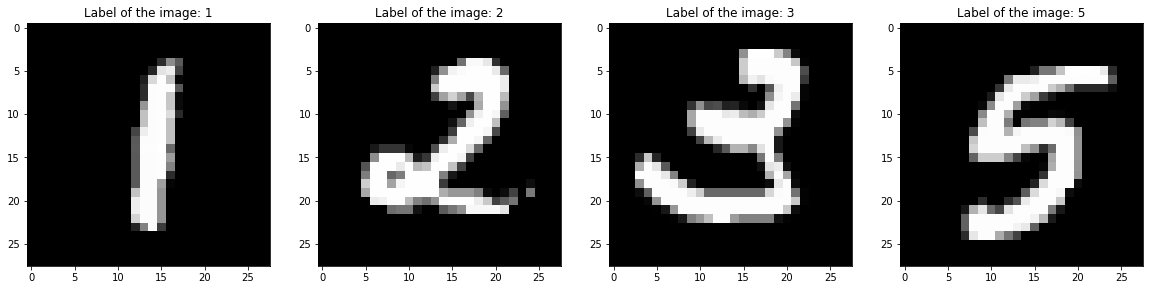

In [5]:
plt.figure(figsize=(20,5))

plt.subplot(141)
plt.imshow(X[123].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y[123]))

plt.subplot(142)
plt.imshow(X[124].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y[124]))

plt.subplot(143)
plt.imshow(X[125].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y[125]))

plt.subplot(144)
plt.imshow(X[126].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y[126]))

plt.show()

Next, we apply PCA to the data. We want to visualize the MNIST data in two-dimensional space. So, we only need to use the first two principal components. For this purpose, we set `n_components=2` inside the PCA class:

In [6]:
# We just want the first two principal components
pca = PCA(n_components=2)

# We get the components by 
# calling fit_transform method with our data
pca_components = pca.fit_transform(X)

We're all set to visualize our dataset in two-dimensional space using the first two components of the PCA. In the graph below, we set the colors of the data points and also label them according to their digits. Note that if you run the following cell, you'll notice that it takes some time to plot the graph. This is not related to PCA at all. It's because we go over each of the 10000 data points to label them with their digits.

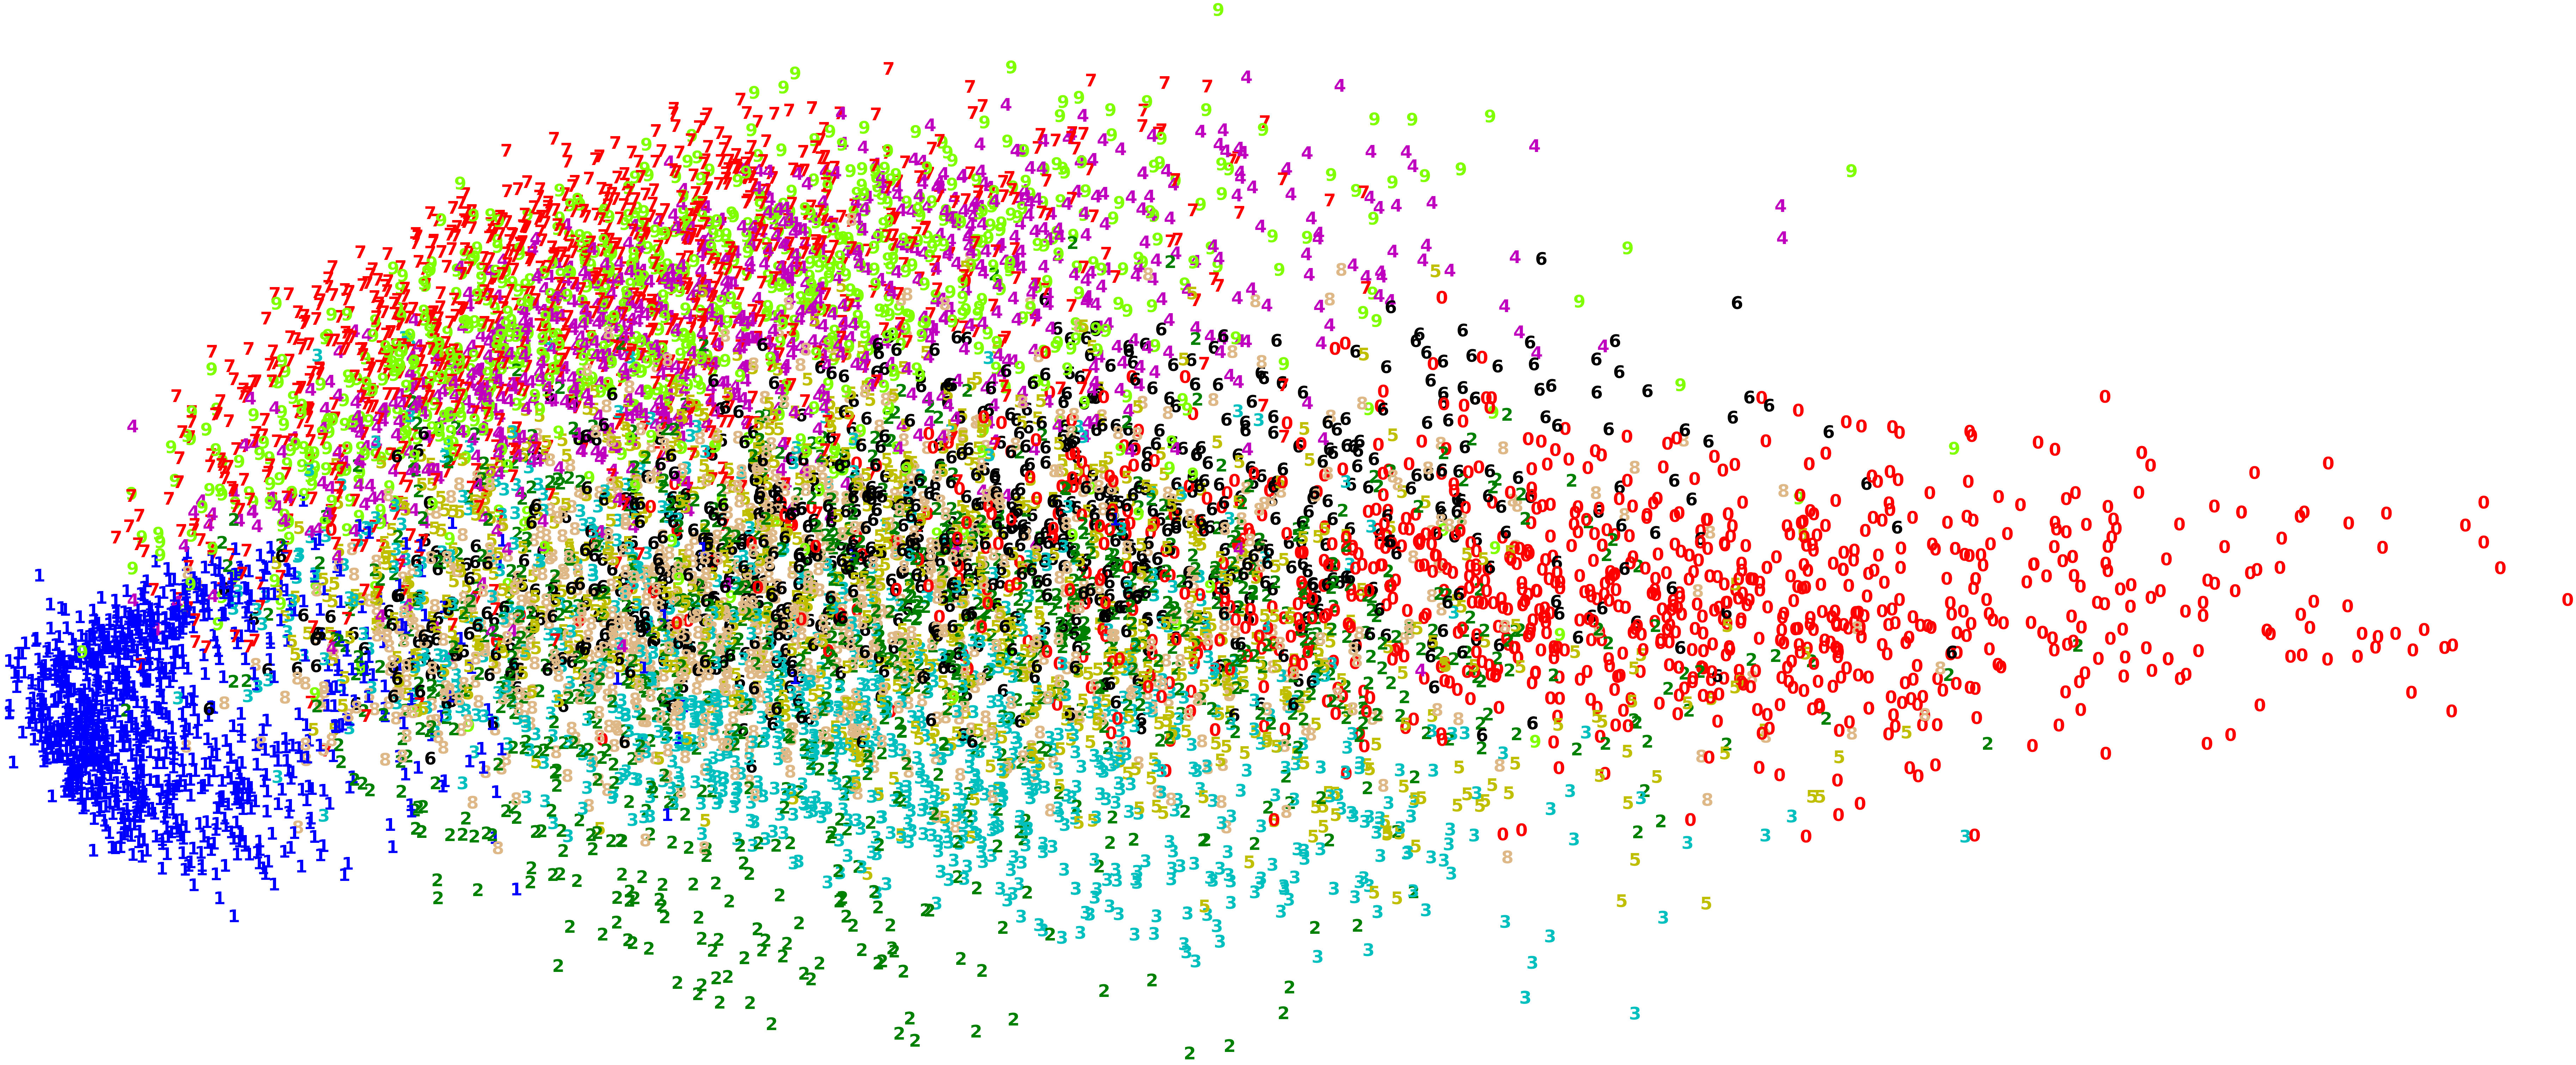

In [7]:
plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(pca_components.shape[0]):
    plt.text(pca_components[i, 0], pca_components[i, 1], str(y[i]),
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

The graph above reveals how the two-dimensional representations of the ten digits spread along the two axis. Most notably, zeros (0s) and ones (1s) occupy the right-most and the left-most regions of the graph respectively. We may argue that zero and one are the two most dissimilar characters in terms of their shapes. This makes sense, as we said above, since PCA retains the global similarity structure of the data and hence dissimilar objects tend to be located far away from each other in the lower-dimensional representation. 

However, local similarities seem to not be preserved well in the graph above. For example, almost every digit is dispersed along the x-axis and intertwined with other digits. Remember that we colored and tagged each point using the true digit information we have. But in an unsupervised task, we wouldn't have that information. In this case, distinguishing the different digits in the graph above couldn't be made easily. Let's check this:

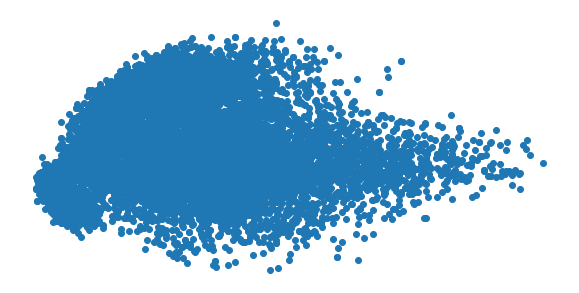

In [8]:
plt.figure(figsize=(10,5))
plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

Are you able to distinguish the different digits in the two-dimensional representation above? Unfortunately, that's not quite possible and we need to find a better method to achieve this, which we'll introduce in the next checkpoint.